*   Student name: **[Michael Cordero]**
*   Student Panther ID: **[6331927]**
*   Collaborator(s): **[Fill your collaborator(s)' name here]**
*   **Notice on Academic Misconduct**: Sharing your codes with other students is also an academic misconduct. If your submission is found unsually similar to that of another student, you will be reported to the SCAI as a potential academic misconduct case, regardless of your reasons. Violations may lead to suspension or expulsion from the university.

# CAP5602 Homework 4 (15% total grade)

## **Deadline: 11/5/2022 11:59 PM**

In this homework, we will train, test, and visualize logistic regression and multi-layer perceptron models on a toy non-linearly separable classification dataset.

## 1. Generate and visualize the data (2% total grade)
In this question, you will write code to generate and visualize the dataset. First, study the following API for the function `make_circles` to generate the dataset: https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_circles.html.

Use this function to generate a dataset `(X, Y)` with **250 samples**, **noise=0.06**, and **factor=0.5**. Then plot the dataset using a scatter plot. For sanity check, your plot should show two noisy concentric circles (one for each class).

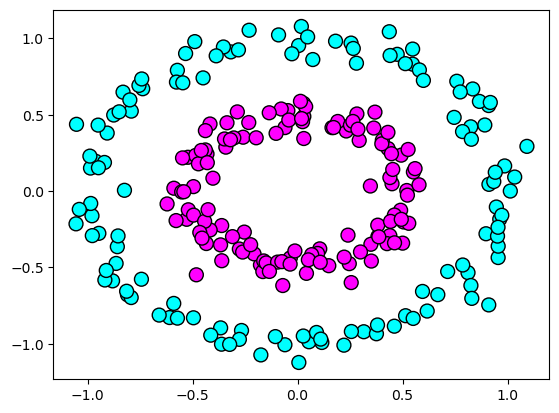

In [1]:
# Write your code here
from sklearn.datasets import make_circles
from matplotlib import pyplot as plot

X, Y = make_circles(n_samples=250, noise=0.06, factor=0.5)
plot.scatter(x=X[:, 0], y=X[:, 1], c=Y, cmap=plot.cm.cool, s=100, edgecolors='k' )

## 2. Split dataset (1% total grade)

Write code to randomly split your dataset above into a train set and a test set. Your train set should contain 150 examples and your test set should contain 100 examples.

In [2]:
# Write your code here
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=100, train_size=150)

## 3. Train and evaluate a logistic regression model (2% total grade)

Write code to train a [logistic regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) model with default parameters using your train set. Then compute and print out the accuracy of the model on your test set.

In [3]:
# Write your code here
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
lrm = LogisticRegression()
lrm.fit(X=X_train,y=Y_train)
y_prediction = lrm.predict(X=X_test)
acc = accuracy_score(Y_test,y_prediction)
print(f"Accuracy: {acc}")

Accuracy: 0.43


## 4. Visualize your model (3% total grade)

Write code to visualize your logistic regression model. You must:
1.   Create a meshgrid on the 2d space covering all your input data.
2.   Make predictions on the meshgrid, reshape it appropriately, and plot the contours of the predictions together with all the data points. Since logistic regression can return label probability distributions, you must use [predict_proba](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression.predict_proba) to make predictions and visualize the probability contours for one of the labels.

**Important**: Since you will need to visualize several models later, you should write the above steps into a function `visualize(model, X, Y)` that can be applied to any model `model` and dataset `(X, Y)`. Then call this function to visualize your logistic regression model.

 


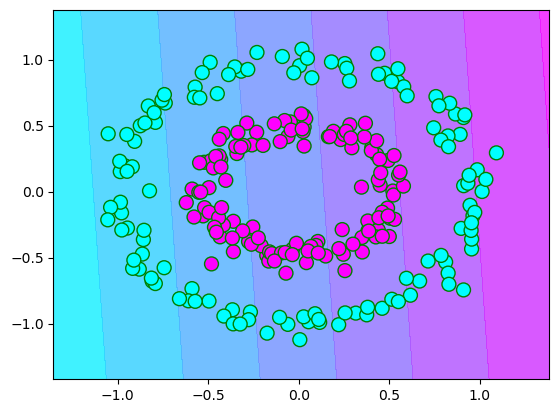

In [4]:
from matplotlib.pyplot import contourf
import numpy as np

def visualize(model, X, Y):
    f0 = X[:,0]
    f1 = X[:,1]
    # step 1
    f0_min, f0_max = f0.min() - 0.3, f0.max() + 0.3
    f1_min, f1_max = f1.min() - 0.3, f1.max() + 0.3
    step_size = 0.01
    xx, yy = np.meshgrid(np.arange(f0_min, f0_max, step_size), np.arange(f1_min, f1_max, step_size))
    # step 2
    Z = model.predict_proba(np.c_[xx.ravel(),yy.ravel()])
    # only need to contour one feature, otherwise this would be included: Z1 = Z[:, 1], Zs = Z1.reshape(yy.shape)
    Z0 = Z[:, 0]
    Zr = Z0.reshape(xx.shape)
    contourf(xx, yy, Zr, cmap=plot.cm.cool, alpha=0.8 )
    plot.scatter(f0, f1, c=Y, cmap=plot.cm.cool, s=100, edgecolors='g')
    plot.show()

visualize(lrm, X, Y)

## 5. Train, evaluate, and visualize an MLP model on your dataset (3% total grade)

Write code to:
1. Train an MLP classifier with one hidden layer containing 20 hidden units. You can use the default value for other parameters of your model.
2. Compute and print out the accuracy of your classifier on the test set.
3. Visualize your MLP model similarly to Question 4 above, using the function `visualize(...)` that you already defined.

**Important**: Again, to reuse your code later, combine the above steps into a single function `investigate_mlp(hidden_layer_sizes)`, where `hidden_layer_sizes` is the parameter specifying the number of hidden units in each layer. See the [MLPClassifier API](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html) for details on this parameter. After writing this function, execute it with an appropriate `hidden_layer_sizes` value to train, evaluate, and visualize your model.

MLP Accuracy: 0.57


/Users/michaelcordero/miniconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


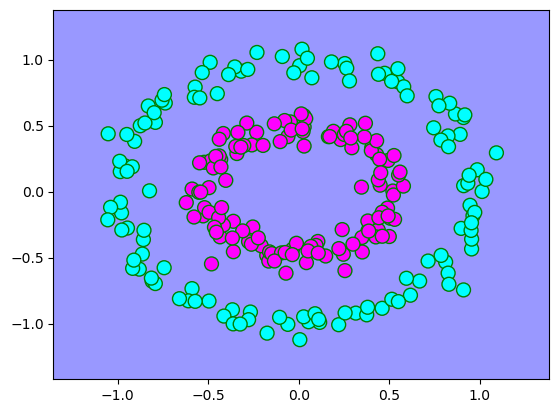

In [5]:
# Write your code here
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

def investigate_mlp(hidden_layer_sizes: tuple):
    mlp = MLPClassifier(hidden_layer_sizes=hidden_layer_sizes)
    mlp.fit(X_train, Y_train)
    mlpY_prediction = mlp.predict(X_test)
    mlp_acc = accuracy_score(Y_test, mlpY_prediction)
    print(f'MLP Accuracy: {mlp_acc}')
    visualize(mlp, X, Y)

investigate_mlp((20,1))

## 6. Investigate Deeper MLPs (2% total grade)

Repeat Question 5 with **4 progressively deeper** MLP models that contain 2, 3, 4 and 5 hidden layers respectively. All layers in these models must also contain 20 hidden nodes. You can use your `investigate_mlp(...)` function for each model.

MLP Accuracy: 0.43


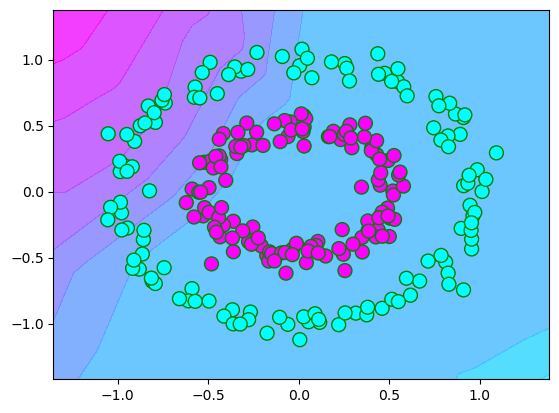

MLP Accuracy: 0.82


/Users/michaelcordero/miniconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


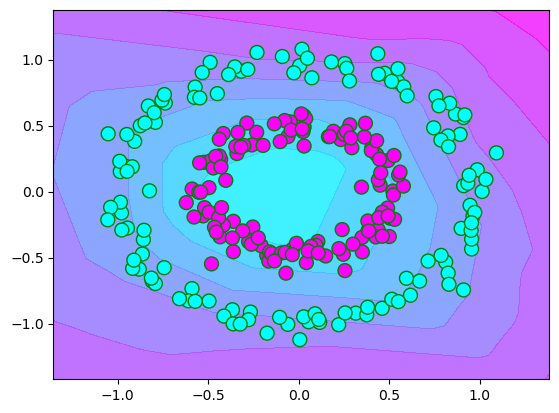

MLP Accuracy: 0.71


/Users/michaelcordero/miniconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


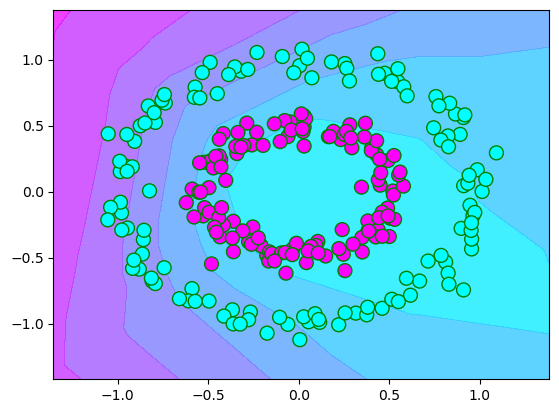

/Users/michaelcordero/miniconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLP Accuracy: 0.8


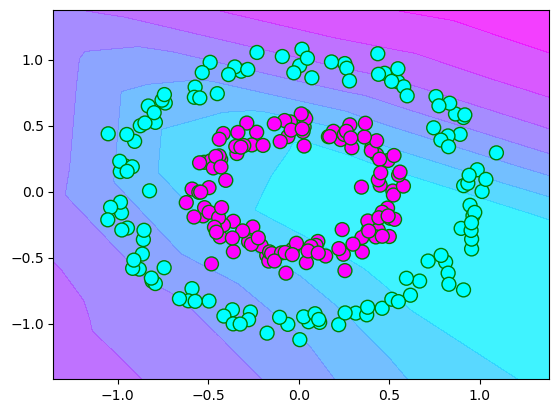

In [6]:
# Write your code here
layers = [2,3,4,5]
for l in layers:
    investigate_mlp((20,l))

## 7. Comparing the models (2% total grade)

What are your observations comparing all the models in this homework?

**Your answer:** (double-click to edit)

In [10]:
# My observation is that the MLP model yields much more accurate results. There are varying degrees of accuracy given the number of hidden layers. The MLP with 5 layers has yielded the highest accuracy after several test runs on Google Colab, as well as test runs in DataSpell IDE.